<h1><center>iNeuron</center></h1>
<h2><center>Mushroom Classification </center></h2>
<h2><center>Domain - Agriculture</center></h2>
<h3><center>Author - Viplove Thakran</center></h3>

#### Problem Statement :
The Audubon Society Field Guide to North American Mushrooms contains descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom (1981). Each species is labelled as either definitely edible, definitely poisonous, or maybe edible but not recommended. This last category was merged with the toxic category. The Guide asserts unequivocally that there is no simple rule for judging a mushroom's edibility, such as "leaflets three, leave it
be" for Poisonous Oak and Ivy. The main goal is to predict which mushroom is poisonous & which is edible.

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pickle
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# set working directory
import io
%cd "D:\Deaktop\iNeuron_Mushroom_Classification-main"

[WinError 3] The system cannot find the path specified: 'D:\\Deaktop\\iNeuron_Mushroom_Classification-main'
D:\Desktop\mushroom


In [3]:
# read the data
mushroom = pd.read_csv('mushrooms.csv')

In [4]:
# show first five records from the data
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


<h4>Dataset Information: Meaning of different values in different columns.</h4> 
<b>Attribute Information:</b><br> 
classes: edible=e, poisonous=p

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [5]:
# dimension of the data
mushroom.shape

(8124, 23)

As you can see that there are 8124 rows and 23 columns in this data.

In [6]:
# datatypes present in our data
mushroom.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

From above information, we can see that all our data is categorical.

In [7]:
# Descriptive statistics of the data
mushroom.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [8]:
# Concise summary of the data
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [9]:
# Lets check how many classes are present in the target column
mushroom['class'].unique()

array(['p', 'e'], dtype=object)

Here we can see that there are two classes present in our target column which are 'p' - poisonous and 'e' - edible.

In [10]:
# Now we will check the counts of classes present in the target column
mushroom['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

From above table we can see that our data is almost balanced as there are almost equal number of 'p' and 'e' classes.

In [11]:
# Check for the null / missing values in our data
mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

As we can see that there no missing/null values in the dataset. However, if you go through the data description you will find that the missing values in one column is replaced with "?". We need to handle this missing values.

In [12]:
for i in mushroom.columns:
    missing = mushroom[i][mushroom[i]=='?'].count()
    if missing != 0:
        print(i, missing)

stalk-root 2480


There are 2480 missing values in 'stalk-root' column. First we will replace this values with np.nan so that we can handle missing data.

In [13]:
mushroom['stalk-root'] = mushroom['stalk-root'].replace(to_replace='?',value=np.nan)

In [14]:
# Lets check for missing values again
mushroom.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

Now we will impute the missing values in 'stalk-root' column using sklearn SimpleImputer

In [15]:
impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [16]:
mushroom['stalk-root'] = impute.fit_transform(mushroom[['stalk-root']])

In [17]:
# Lets check how many unique values are present in each columns
for i in mushroom.columns:
    print(i,mushroom[i].nunique())

class 2
cap-shape 6
cap-surface 4
cap-color 10
bruises 2
odor 9
gill-attachment 2
gill-spacing 2
gill-size 2
gill-color 12
stalk-shape 2
stalk-root 4
stalk-surface-above-ring 4
stalk-surface-below-ring 4
stalk-color-above-ring 9
stalk-color-below-ring 9
veil-type 1
veil-color 4
ring-number 3
ring-type 5
spore-print-color 9
population 6
habitat 7


From above data we can see that 'veil-type' has only one value throughout the data. So it won't give us much information regarding the class of the mushroom. So we will drop this column.

In [18]:
mushroom = mushroom.drop(['veil-type'],axis=1)

In [19]:
mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Now there are no missing values in our data

### Exploratory Data Analysis

Now we will visualize our data using matplotlib and seaborn

Here we will include only those columns which we have obtained during feature selection part.

In [20]:
# Let's check the counts of classes present in Target column "class" 
mushroom['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

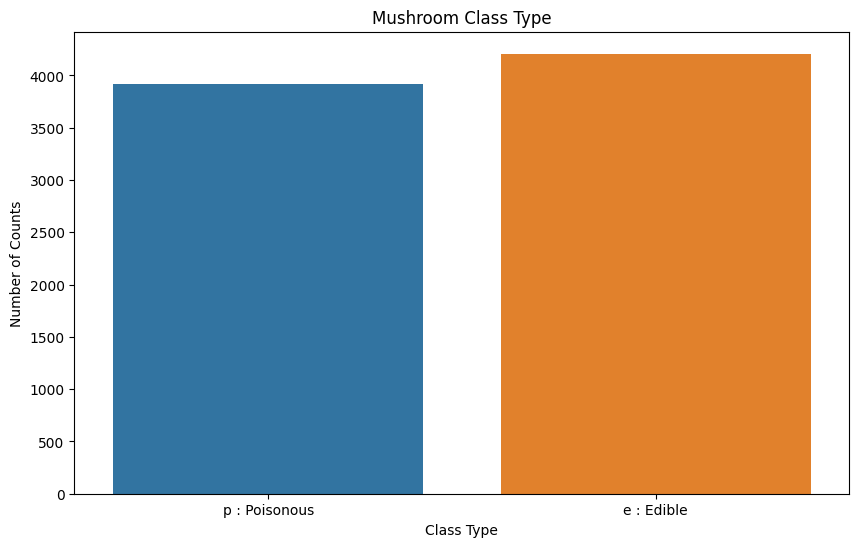

In [21]:
# let's visualize the target column 'class'

plt.figure(figsize=(10,6))
mush_class = sns.countplot(x='class',data=mushroom)
plt.xlabel('Class Type')
plt.ylabel('Number of Counts')
mush_class.set_xticklabels(['p : Poisonous','e : Edible'])
plt.title('Mushroom Class Type')
plt.show()

From above countplot we can see that the class type 'poisonous' has 3916 counts and 'edible' has 4208 counts so we have nearly equal counts for poisonous and edible classes in our data. Hence we can say that our data is balanced.

In [22]:
# Let's check count of classes present in 'cap-surface' column
CapSurface = mushroom['cap-surface'].value_counts()
CapSurface

y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

In [23]:
# Let's see each type with the counts of target class column
mushroom.groupby(['cap-surface'])['class'].value_counts()

cap-surface  class
f            e        1560
             p         760
g            p           4
s            p        1412
             e        1144
y            p        1740
             e        1504
Name: class, dtype: int64

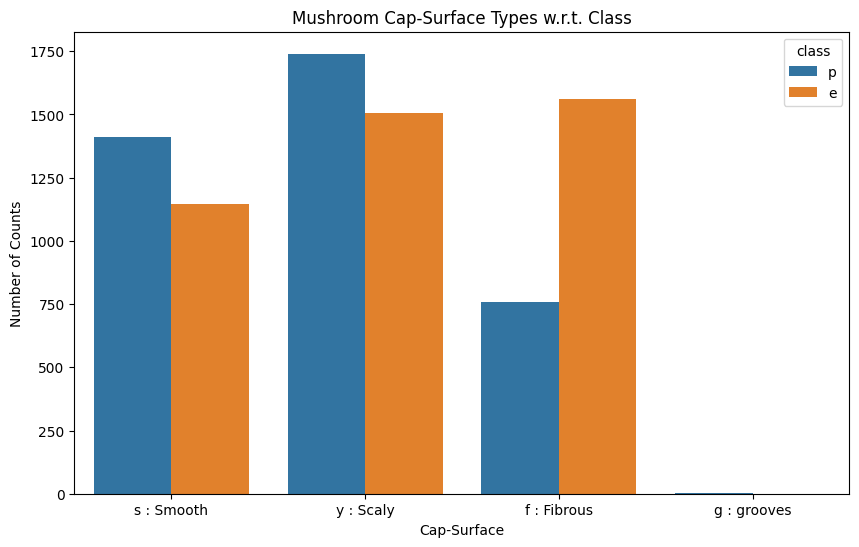

In [24]:
# Let's visualize the feature column 'cap-surface' w.r.t. target column 'class'

plt.figure(figsize=(10,6))
cap_surface = sns.countplot(x='cap-surface',data=mushroom,hue='class')
plt.xlabel('Cap-Surface')
plt.ylabel('Number of Counts')
cap_surface.set_xticklabels(['s : Smooth', 'y : Scaly', 'f : Fibrous', 'g : grooves'])
plt.title('Mushroom Cap-Surface Types w.r.t. Class')
plt.show()

From above analysis, we can say that there are 4 types of cap-surface in a mushroom and also it suggests that 'edible' mushrooms do not have 'cap-surface' : 'g : grooves' according to our data.

In [25]:
# Let's check count of classes present in 'bruises' column
Bruises = mushroom['bruises'].value_counts()
Bruises

f    4748
t    3376
Name: bruises, dtype: int64

In [26]:
# Let's see each type with the counts of target class column
mushroom.groupby(['bruises'])['class'].value_counts()

bruises  class
f        p        3292
         e        1456
t        e        2752
         p         624
Name: class, dtype: int64

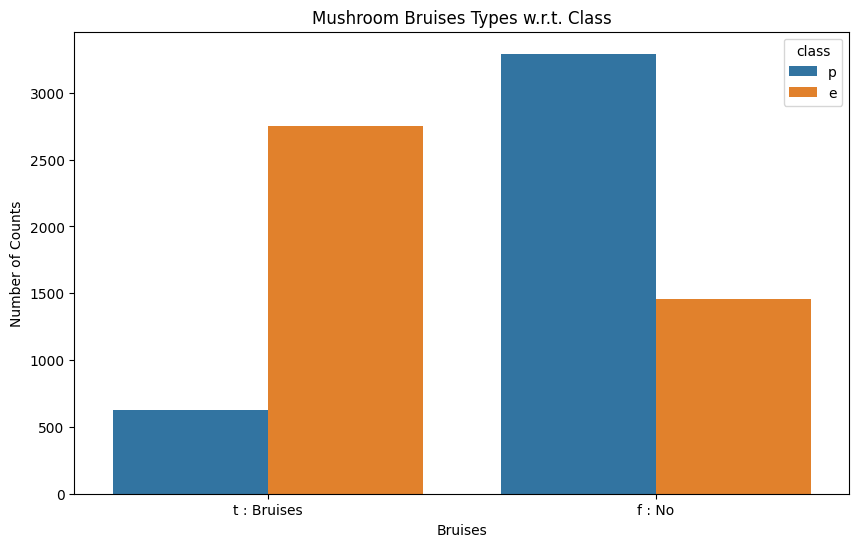

In [27]:
# Let's visualize the feature column 'bruises' w.r.t. target column 'class'

plt.figure(figsize=(10,6))
bruises = sns.countplot(x='bruises',data=mushroom,hue='class')
plt.xlabel('Bruises')
plt.ylabel('Number of Counts')
bruises.set_xticklabels(['t : Bruises', 'f : No'])
plt.title('Mushroom Bruises Types w.r.t. Class')
plt.show()

From above analysis, we can say that mushroom may or may not have bruises but still it could be poisonous or edible according to our data.

In [28]:
# Let's check count of classes present in 'bruises' column
GillSpacing = mushroom['gill-spacing'].value_counts()
GillSpacing

c    6812
w    1312
Name: gill-spacing, dtype: int64

In [29]:
# Let's see each type with the counts of target class column
mushroom.groupby(['gill-spacing'])['class'].value_counts()

gill-spacing  class
c             p        3804
              e        3008
w             e        1200
              p         112
Name: class, dtype: int64

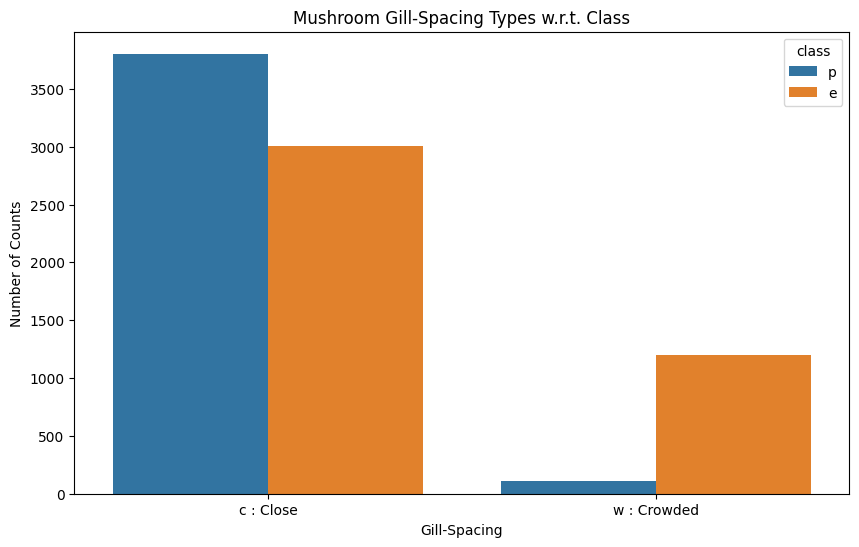

In [30]:
# Let's visualize the feature column 'gill-spacing' w.r.t. target column 'class'

plt.figure(figsize=(10,6))
gill_spacing = sns.countplot(x='gill-spacing',data=mushroom,hue='class')
plt.xlabel('Gill-Spacing')
plt.ylabel('Number of Counts')
gill_spacing.set_xticklabels(['c : Close', 'w : Crowded'])
plt.title('Mushroom Gill-Spacing Types w.r.t. Class')
plt.show()

From above analysis, we can say that mushroom can have Gill Spacing as Close or Crowded but still it could be poisonous or edible according to our data.

In [31]:
# Let's check count of classes present in 'gill-size' column
GillSize = mushroom['gill-size'].value_counts()
GillSize

b    5612
n    2512
Name: gill-size, dtype: int64

In [32]:
# Let's see each type with the counts of target class column
mushroom.groupby(['gill-size'])['class'].value_counts()

gill-size  class
b          e        3920
           p        1692
n          p        2224
           e         288
Name: class, dtype: int64

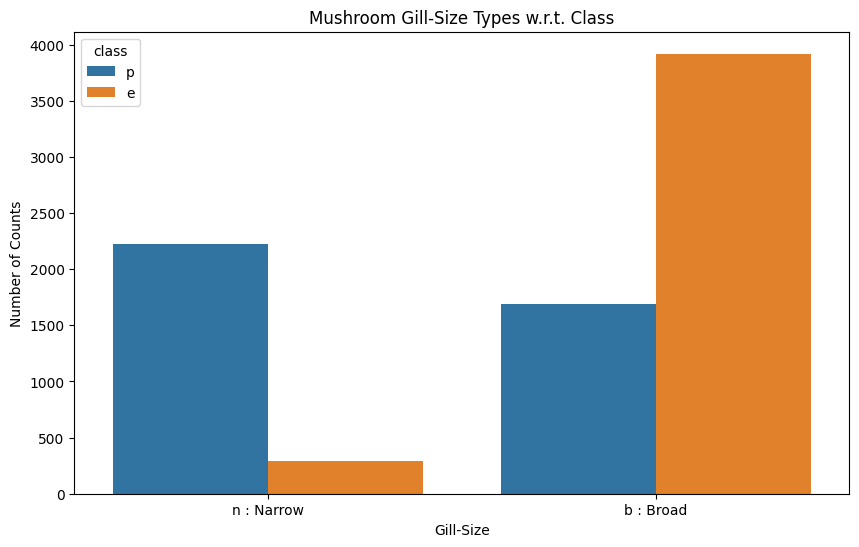

In [33]:
# Let's visualize the feature column 'gill-size' w.r.t. target column 'class'

plt.figure(figsize=(10,6))
gill_size = sns.countplot(x='gill-size',data=mushroom,hue='class')
plt.xlabel('Gill-Size')
plt.ylabel('Number of Counts')
gill_size.set_xticklabels(['n : Narrow', 'b : Broad'])
plt.title('Mushroom Gill-Size Types w.r.t. Class')
plt.show()

From above analysis, we can say that mushroom can have Gill Size as Narrow or Broad but still it could be poisonous or edible according to our data.

In [34]:
# Let's check count of classes present in 'gill-color' column
GillColor = mushroom['gill-color'].value_counts()
GillColor

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

In [35]:
# Let's see each type with the counts of target class column
mushroom.groupby(['gill-color'])['class'].value_counts()

gill-color  class
b           p        1728
e           e          96
g           p         504
            e         248
h           p         528
            e         204
k           e         344
            p          64
n           e         936
            p         112
o           e          64
p           e         852
            p         640
r           p          24
u           e         444
            p          48
w           e         956
            p         246
y           e          64
            p          22
Name: class, dtype: int64

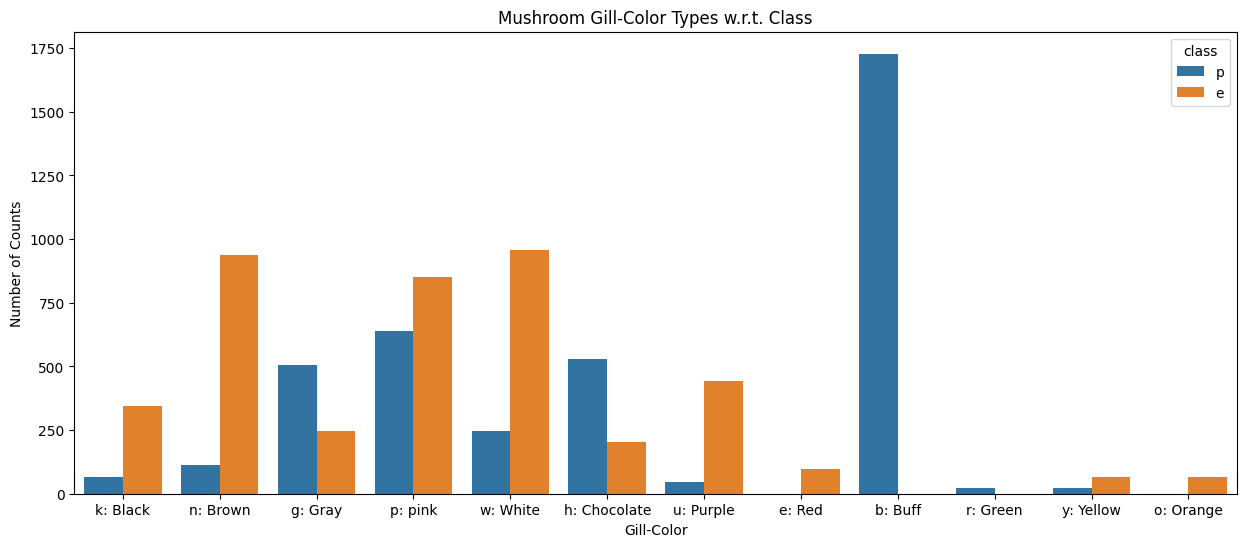

In [36]:
# Let's visualize the feature column 'gill-color' w.r.t. target column 'class'

plt.figure(figsize=(15,6))
gill_color = sns.countplot(x='gill-color',data=mushroom,hue='class')
plt.xlabel('Gill-Color')
plt.ylabel('Number of Counts')
gill_color.set_xticklabels(['k: Black', 'n: Brown', 'g: Gray', 'p: pink', 'w: White', 
                           'h: Chocolate', 'u: Purple', 'e: Red', 'b: Buff', 'r: Green', 
                           'y: Yellow', 'o: Orange'])
plt.title('Mushroom Gill-Color Types w.r.t. Class')
plt.show()

From above analysis, we can say that 'edible' mushroom do not have Gill Color : Buff, Green and 'poisonous' mushroom do not have Gill Color : Red, Orange according to our data.

In [37]:
# Let's check count of classes present in 'stalk-root' column
StalkRoot = mushroom['stalk-root'].value_counts()
StalkRoot

b    6256
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [38]:
# Let's see each type with the counts of target class column
mushroom.groupby(['stalk-root'])['class'].value_counts()

stalk-root  class
b           p        3616
            e        2640
c           e         512
            p          44
e           e         864
            p         256
r           e         192
Name: class, dtype: int64

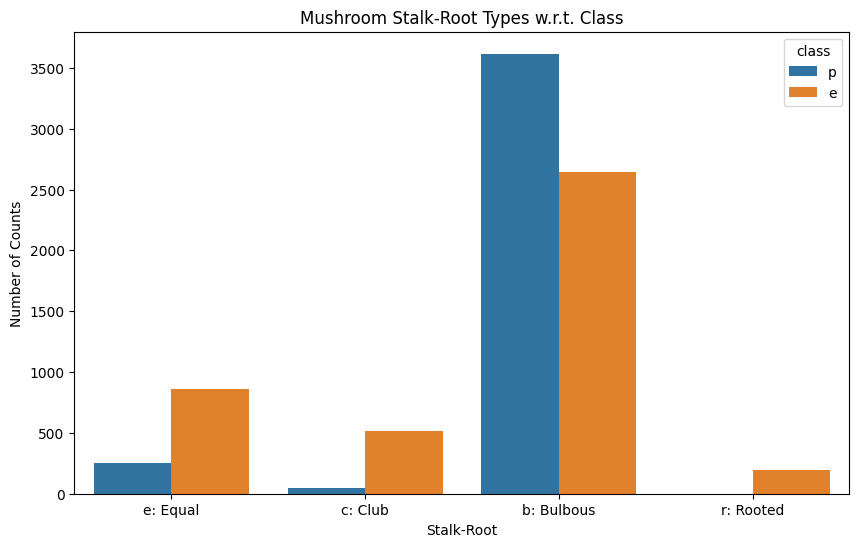

In [39]:
# Let's visualize the feature column 'stalk-root' w.r.t. target column 'class'

plt.figure(figsize=(10,6))
stalk_root = sns.countplot(x='stalk-root',data=mushroom,hue='class')
plt.xlabel('Stalk-Root')
plt.ylabel('Number of Counts')
stalk_root.set_xticklabels(['e: Equal', 'c: Club', 'b: Bulbous', 'r: Rooted'])
plt.title('Mushroom Stalk-Root Types w.r.t. Class')
plt.show()

From above analysis, we can say that 'poisonous' mushroom do not have Stalk Root as Rooted type according to our data.

In [40]:
# Let's check count of classes present in 'stalk-surface-above-ring' column
StalkSurfaceAboveRing = mushroom['stalk-surface-above-ring'].value_counts()
StalkSurfaceAboveRing

s    5176
k    2372
f     552
y      24
Name: stalk-surface-above-ring, dtype: int64

In [41]:
# Let's see each type with the counts of target class column
mushroom.groupby(['stalk-surface-above-ring'])['class'].value_counts()

stalk-surface-above-ring  class
f                         e         408
                          p         144
k                         p        2228
                          e         144
s                         e        3640
                          p        1536
y                         e          16
                          p           8
Name: class, dtype: int64

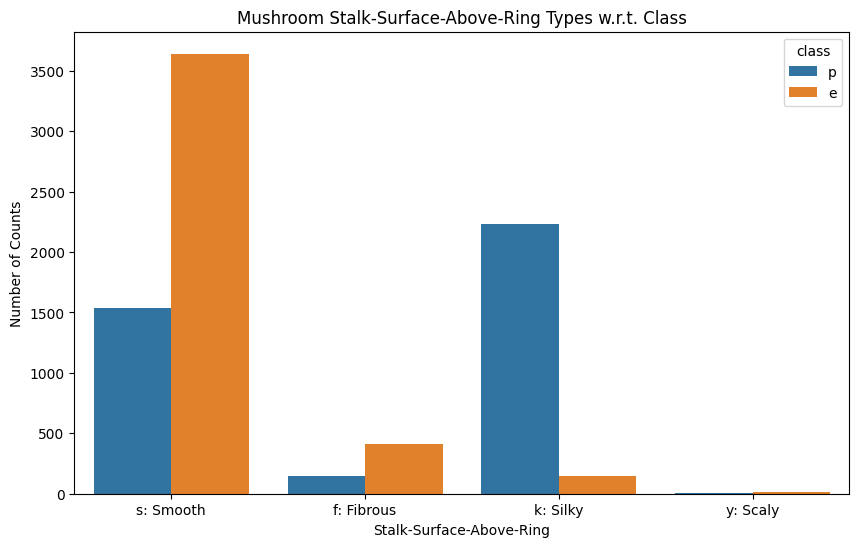

In [42]:
# Let's visualize the feature column 'stalk-surface-above-ring' w.r.t. target column 'class'

plt.figure(figsize=(10,6))
stalk_surface_above_ring = sns.countplot(x='stalk-surface-above-ring',data=mushroom,hue='class')
plt.xlabel('Stalk-Surface-Above-Ring')
plt.ylabel('Number of Counts')
stalk_surface_above_ring.set_xticklabels(['s: Smooth', 'f: Fibrous', 'k: Silky', 'y: Scaly'])
plt.title('Mushroom Stalk-Surface-Above-Ring Types w.r.t. Class')
plt.show()

From above analysis, we can say that mushroom can have Stalk-Surface-Above-Ring as Smooth, Fibrous, Silky or Scaly but still it could be poisonous or edible according to our data.

In [43]:
# Let's check count of classes present in 'stalk-surface-below-ring' column
StalkSurfaceBelowRing = mushroom['stalk-surface-below-ring'].value_counts()
StalkSurfaceBelowRing

s    4936
k    2304
f     600
y     284
Name: stalk-surface-below-ring, dtype: int64

In [44]:
# Let's see each type with the counts of target class column
mushroom.groupby(['stalk-surface-below-ring'])['class'].value_counts()

stalk-surface-below-ring  class
f                         e         456
                          p         144
k                         p        2160
                          e         144
s                         e        3400
                          p        1536
y                         e         208
                          p          76
Name: class, dtype: int64

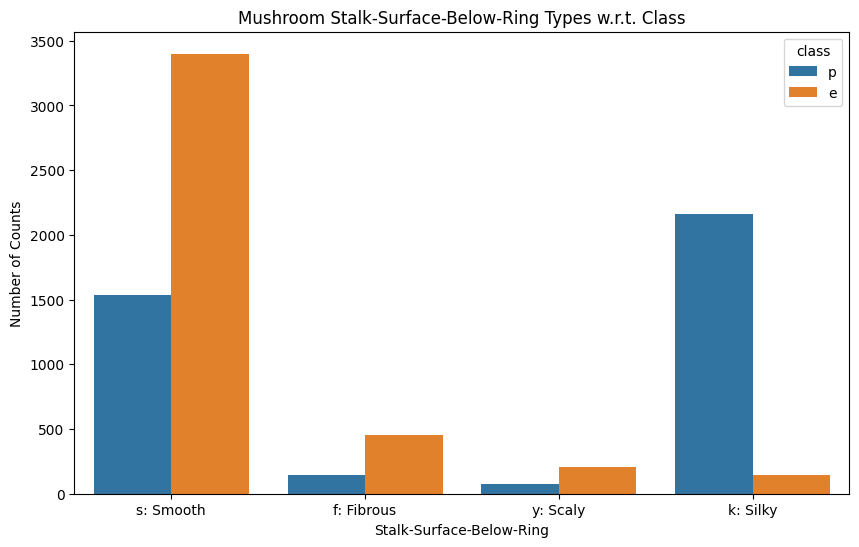

In [45]:
# Let's visualize the feature column 'stalk-surface-below-ring' w.r.t. target column 'class'

plt.figure(figsize=(10,6))
stalk_surface_below_ring = sns.countplot(x='stalk-surface-below-ring',data=mushroom,hue='class')
plt.xlabel('Stalk-Surface-Below-Ring')
plt.ylabel('Number of Counts')
stalk_surface_below_ring.set_xticklabels(['s: Smooth', 'f: Fibrous', 'y: Scaly', 'k: Silky'])
plt.title('Mushroom Stalk-Surface-Below-Ring Types w.r.t. Class')
plt.show()

From above analysis, we can say that mushroom can have Stalk-Surface-Below-Ring as Smooth, Fibrous, Silky or Scaly but still it could be poisonous or edible according to our data.

In [46]:
# Let's check count of classes present in 'ring-type' column
RingType = mushroom['ring-type'].value_counts()
RingType

p    3968
e    2776
l    1296
f      48
n      36
Name: ring-type, dtype: int64

In [47]:
# Let's see each type with the counts of target class column
mushroom.groupby(['ring-type'])['class'].value_counts()

ring-type  class
e          p        1768
           e        1008
f          e          48
l          p        1296
n          p          36
p          e        3152
           p         816
Name: class, dtype: int64

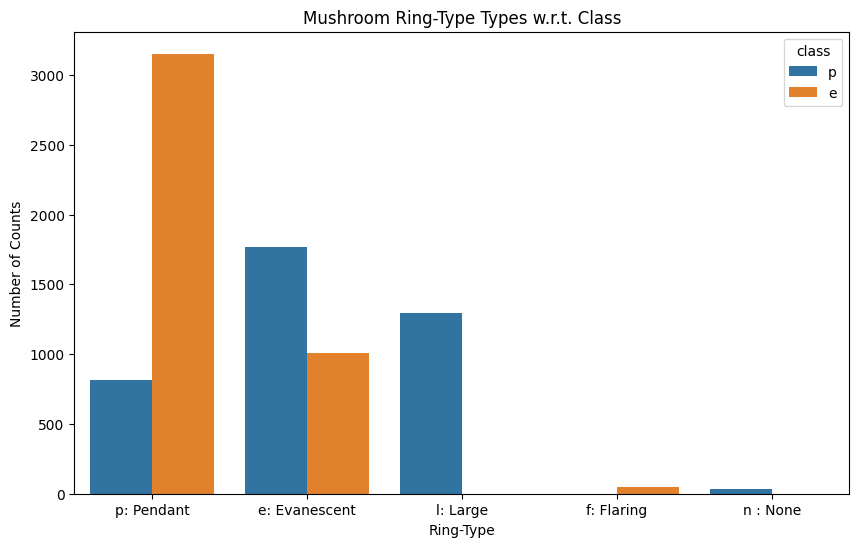

In [48]:
# Let's visualize the feature column 'ring-type' w.r.t. target column 'class'

plt.figure(figsize=(10,6))
ring_type = sns.countplot(x='ring-type',data=mushroom,hue='class')
plt.xlabel('Ring-Type')
plt.ylabel('Number of Counts')
ring_type.set_xticklabels(['p: Pendant', 'e: Evanescent', 'l: Large', 'f: Flaring', 'n : None'])
plt.title('Mushroom Ring-Type Types w.r.t. Class')
plt.show()

From above analysis, we can say that 'edible' mushroom do not have Ring-Type as Large and None and 'poisonous' mushroom do not have Ring-Type as Flaring according to our data.

In [49]:
# Let's check count of classes present in 'spore-print-color' column
SporePrintColor = mushroom['spore-print-color'].value_counts()
SporePrintColor

w    2388
n    1968
k    1872
h    1632
r      72
u      48
o      48
y      48
b      48
Name: spore-print-color, dtype: int64

In [50]:
# Let's see each type with the counts of target class column
mushroom.groupby(['spore-print-color'])['class'].value_counts()

spore-print-color  class
b                  e          48
h                  p        1584
                   e          48
k                  e        1648
                   p         224
n                  e        1744
                   p         224
o                  e          48
r                  p          72
u                  e          48
w                  p        1812
                   e         576
y                  e          48
Name: class, dtype: int64

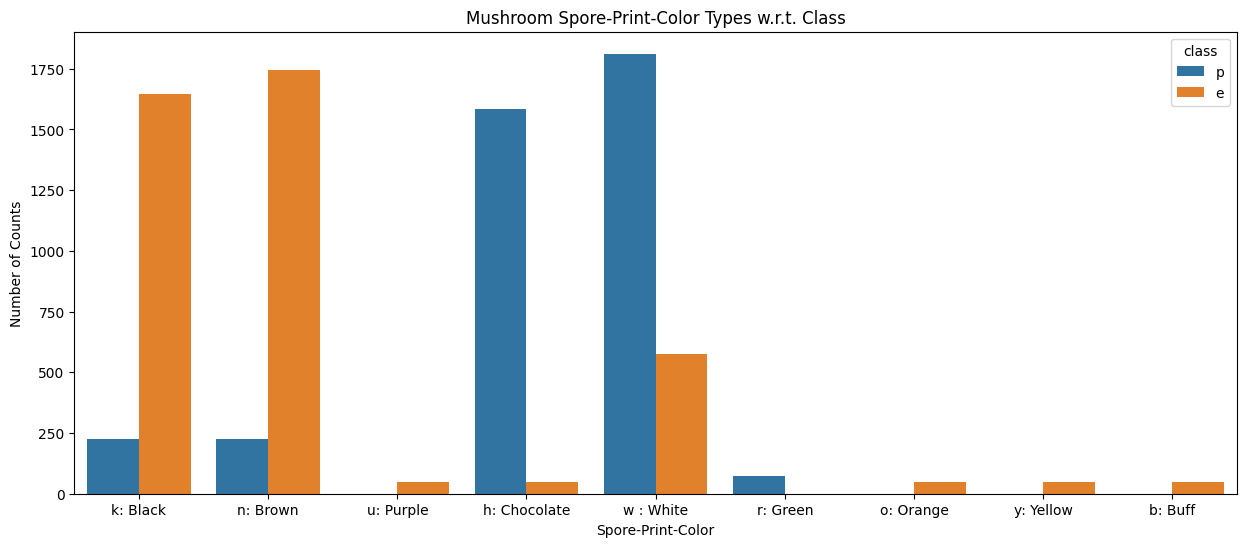

In [51]:
# Let's visualize the feature column 'spore-print-color' w.r.t. target column 'class'

plt.figure(figsize=(15,6))
spore_print_color = sns.countplot(x='spore-print-color',data=mushroom,hue='class')
plt.xlabel('Spore-Print-Color')
plt.ylabel('Number of Counts')
spore_print_color.set_xticklabels(['k: Black', 'n: Brown', 'u: Purple', 'h: Chocolate', 'w : White', 
                                  'r: Green', 'o: Orange', 'y: Yellow', 'b: Buff'])
plt.title('Mushroom Spore-Print-Color Types w.r.t. Class')
plt.show()

From above analysis, we can say that 'edible' mushrooms do not have Spore-Print-Color as Green and 'poisonous' mushrooms do not have Spore-Print-Color as Purple, Orange, Yellow, Buff according to our data.

In [52]:
# Let's check count of classes present in 'population' column
Population = mushroom['population'].value_counts()
Population

v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: population, dtype: int64

In [53]:
# Let's see each type with the counts of target class column
mushroom.groupby(['population'])['class'].value_counts()

population  class
a           e         384
c           e         288
            p          52
n           e         400
s           e         880
            p         368
v           p        2848
            e        1192
y           e        1064
            p         648
Name: class, dtype: int64

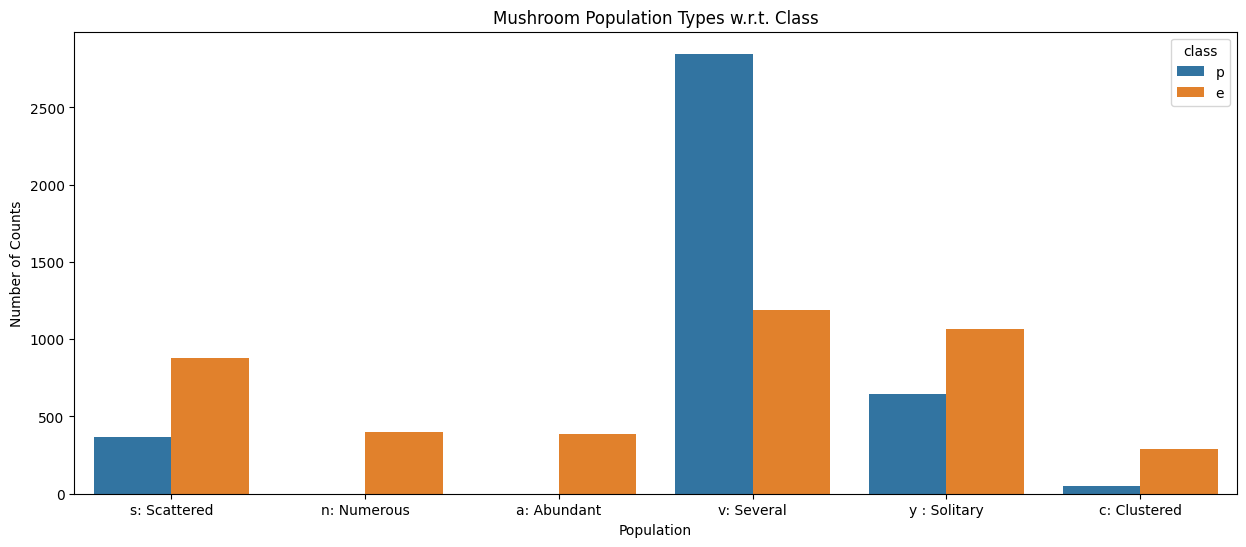

In [54]:
# Let's visualize the feature column 'population' w.r.t. target column 'class'

plt.figure(figsize=(15,6))
population = sns.countplot(x='population',data=mushroom,hue='class')
plt.xlabel('Population')
plt.ylabel('Number of Counts')
population.set_xticklabels(['s: Scattered', 'n: Numerous', 'a: Abundant', 'v: Several', 'y : Solitary', 'c: Clustered'])
plt.title('Mushroom Population Types w.r.t. Class')
plt.show()

From above analysis, we can say that 'poisonous' mushrooms do not have Population Type as Numerous and Abundant according to our data.

In [55]:
# Let's check count of classes present in 'habitat' column
Habitat = mushroom['habitat'].value_counts()
Habitat

d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64

In [56]:
# Let's see each type with the counts of target class column
mushroom.groupby(['habitat'])['class'].value_counts()

habitat  class
d        e        1880
         p        1268
g        e        1408
         p         740
l        p         592
         e         240
m        e         256
         p          36
p        p        1008
         e         136
u        p         272
         e          96
w        e         192
Name: class, dtype: int64

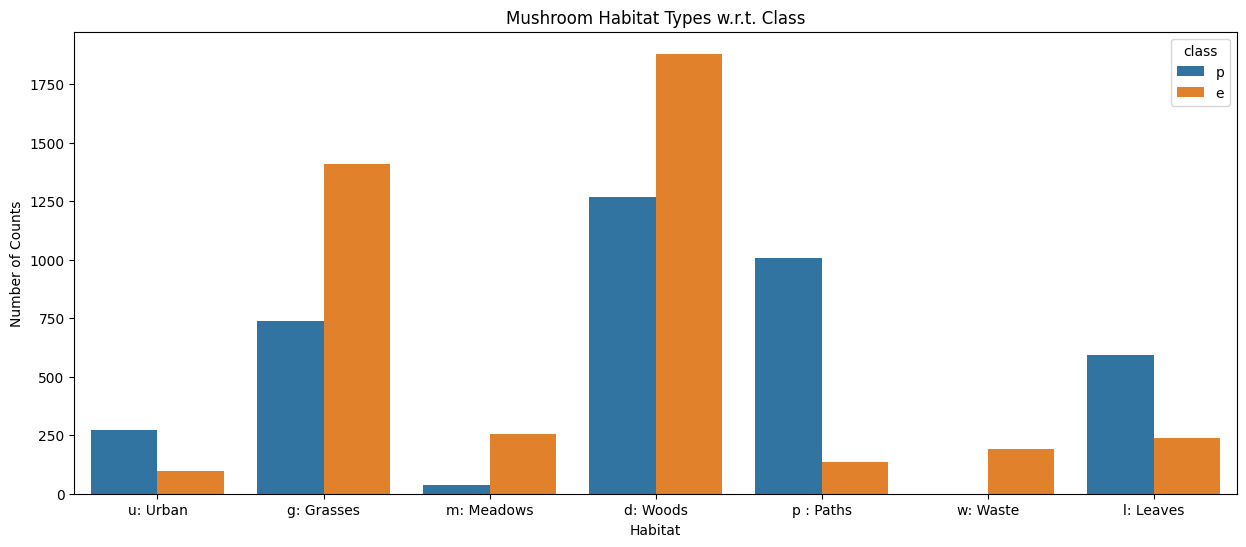

In [57]:
# Let's visualize the feature column 'habitat' w.r.t. target column 'class'

plt.figure(figsize=(15,6))
habitat = sns.countplot(x='habitat',data=mushroom,hue='class')
plt.xlabel('Habitat')
plt.ylabel('Number of Counts')
habitat.set_xticklabels(['u: Urban', 'g: Grasses', 'm: Meadows', 'd: Woods', 'p : Paths', 'w: Waste', 'l: Leaves'])
plt.title('Mushroom Habitat Types w.r.t. Class')
plt.show()

From above analysis, we can say that 'poisonous' mushrooms do not have Habitat Type as Waste according to our data.

### Data Preprocessing

In [58]:
# First we will map our target column to 0 and 1 values 
mushroom['class'] = mushroom['class'].map({'p':0,'e':1})

In [59]:
mushroom['class'].value_counts()

1    4208
0    3916
Name: class, dtype: int64

Now we will split our data into independent features - X  and dependent target - y.

In [60]:
X = mushroom.drop(['class'],axis=1) # independent features
y = mushroom['class'] # target 

Since our data is of categorical type we will use LabelEncoder to convert it into numerical.

In [61]:
# create an instance of label encoder 
le = LabelEncoder()

In [62]:
# using label encoder to transform independent features
X = X.apply(le.fit_transform)

In [63]:
# Let's take a look at our data
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,2,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,1,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,1,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,2,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,2,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,2,1,0,7,4,2


Now we will split our data into train and test set

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Now we will use feature selection to find out best features to use for our model. For this purpose we will use SelectKBest method with score_func as chi2

In [65]:
fs = SelectKBest(score_func=chi2, k ='all')

In [66]:
# fitting train and test data
fs.fit(X_train, y_train)

SelectKBest(k='all', score_func=<function chi2 at 0x0000021F724D0160>)

Feature 0: 8.818258
Feature 1: 147.222728
Feature 2: 5.616870
Feature 3: 825.153563
Feature 4: 57.656504
Feature 5: 2.423365
Feature 6: 536.650762
Feature 7: 1124.382043
Feature 8: 4100.311755
Feature 9: 24.934554
Feature 10: 896.695835
Feature 11: 149.738624
Feature 12: 143.675387
Feature 13: 73.765103
Feature 14: 70.684097
Feature 15: 3.793498
Feature 16: 17.619193
Feature 17: 1322.017823
Feature 18: 265.304896
Feature 19: 211.531223
Feature 20: 501.493459


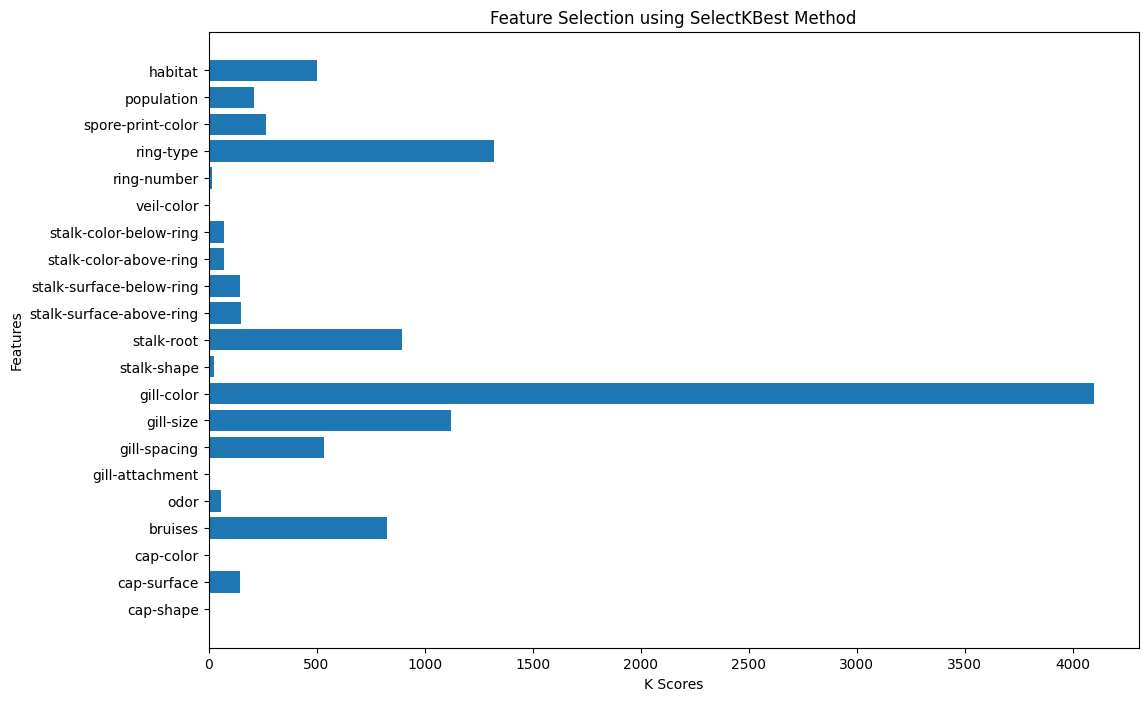

In [67]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.figure(figsize=(12, 8))
plt.barh([i for i in range(len(fs.scores_))], fs.scores_)
plt.ylabel('Features')
plt.xlabel('K Scores')
plt.yticks(ticks=range(0,21), labels=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 
            'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
            'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 
            'population', 'habitat'])
plt.title('Feature Selection using SelectKBest Method')
plt.show()

In [68]:
X_train.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'], dtype='object')

After carefully analyzing above figure, we can now drop columns which are not necessary for our calculation.

In [69]:
X_train_new = X_train.drop(['cap-shape', 'cap-color', 'odor', 'gill-attachment', 'stalk-shape', 
                           'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
                           'ring-number'], axis=1)

In [70]:
# check dimensions of new train data
X_train_new.shape

(5443, 12)

In [71]:
# show first 5 records
X_train_new.head()

,cap-surface,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,spore-print-color,population,habitat
3244,0,1,0,0,5,0,2,2,4,2,5,0
3739,0,0,1,1,7,0,2,2,4,2,4,0
2154,0,1,0,0,5,0,2,2,4,3,5,0
1344,2,0,1,0,5,2,2,2,0,3,3,1
7852,3,0,0,1,0,0,2,1,0,7,4,2


In [72]:
# drop unnecessary columns from test data also
X_test_new = X_test.drop(['cap-shape', 'cap-color', 'odor', 'gill-attachment', 'stalk-shape', 
                           'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
                           'ring-number'], axis=1)

In [73]:
# check dimensions of new test data
X_test_new.shape

(2681, 12)

In [74]:
# show first 5 records
X_test_new.head()

,cap-surface,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,spore-print-color,population,habitat
1971,0,0,1,0,3,2,2,0,0,3,3,1
6654,2,0,0,1,0,0,2,2,0,7,4,2
5606,3,0,0,1,0,0,1,2,0,7,4,2
3332,3,1,0,0,5,0,2,2,4,3,5,0
6988,2,0,0,1,0,0,2,2,0,7,4,2


Now we will scale our data for model training using Standard Scaler

In [75]:
# create an instance of Standard Scaler
SS = StandardScaler()

In [76]:
# applying transformation on train data
X_train_scaled = pd.DataFrame(SS.fit_transform(X_train_new),columns=X_train_new.columns)

In [77]:
# Let's see how our data looks
X_train_scaled

,cap-surface,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,spore-print-color,population,habitat
0,-1.480248,1.183626,-0.435875,-0.665583,0.052222,-0.504847,0.683206,0.588492,0.953185,-0.675786,1.073563,-0.874934
1,-1.480248,-0.844861,2.294237,1.502442,0.614531,-0.504847,0.683206,0.588492,0.953185,-0.675786,0.281237,-0.874934
2,-1.480248,1.183626,-0.435875,-0.665583,0.052222,-0.504847,0.683206,0.588492,0.953185,-0.255984,1.073563,-0.874934
3,0.144473,-0.844861,2.294237,-0.665583,0.052222,1.984178,0.683206,0.588492,-1.263515,-0.255984,-0.511089,-0.293034
4,0.956833,-0.844861,-0.435875,1.502442,-1.353548,-0.504847,0.683206,-0.896515,-1.263515,1.423223,0.281237,0.288865
...,...,...,...,...,...,...,...,...,...,...,...,...
5438,0.956833,-0.844861,-0.435875,1.502442,-1.353548,-0.504847,-0.925224,0.588492,-1.263515,1.423223,0.281237,1.452664
5439,0.956833,1.183626,-0.435875,-0.665583,1.457993,-0.504847,0.683206,0.588492,-1.263515,1.423223,-2.095740,2.616463
5440,0.956833,1.183626,-0.435875,-0.665583,1.457993,3.228691,0.683206,2.073499,0.953185,-0.255984,1.073563,1.452664
5441,0.144473,-0.844861,-0.435875,1.502442,-1.353548,-0.504847,0.683206,0.588492,-1.263515,1.423223,0.281237,1.452664


In [78]:
# applying the same transformations on test data
X_test_scaled = pd.DataFrame(SS.transform(X_test_new),columns=X_test_new.columns)

In [79]:
# let's see how our data looks
X_test_scaled

,cap-surface,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,spore-print-color,population,habitat
0,-1.480248,-0.844861,2.294237,-0.665583,-0.510086,1.984178,0.683206,-2.381523,-1.263515,-0.255984,-0.511089,-0.293034
1,0.144473,-0.844861,-0.435875,1.502442,-1.353548,-0.504847,0.683206,0.588492,-1.263515,1.423223,0.281237,0.288865
2,0.956833,-0.844861,-0.435875,1.502442,-1.353548,-0.504847,-0.925224,0.588492,-1.263515,1.423223,0.281237,0.288865
3,0.956833,1.183626,-0.435875,-0.665583,0.052222,-0.504847,0.683206,0.588492,0.953185,-0.255984,1.073563,-0.874934
4,0.144473,-0.844861,-0.435875,1.502442,-1.353548,-0.504847,0.683206,0.588492,-1.263515,1.423223,0.281237,0.288865
...,...,...,...,...,...,...,...,...,...,...,...,...
2676,0.144473,-0.844861,-0.435875,1.502442,-1.353548,-0.504847,0.683206,-0.896515,-1.263515,1.423223,0.281237,0.288865
2677,0.144473,-0.844861,2.294237,-0.665583,1.457993,-0.504847,-0.925224,-0.896515,0.953185,1.423223,-0.511089,-0.293034
2678,-1.480248,1.183626,-0.435875,-0.665583,0.052222,-0.504847,0.683206,0.588492,0.953185,-0.675786,1.073563,-0.874934
2679,0.956833,-0.844861,-0.435875,1.502442,0.614531,-0.504847,0.683206,-2.381523,-0.709340,-1.095588,0.281237,-0.874934


### XGBoost Classifier

We will use XGBoost Classifier model for this project

In [80]:
# create an instance of XGBoost Classifier
xgbc = XGBClassifier()

In [81]:
# let's train our model using training data
xgbc.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [82]:
# check model score
xgbc.score(X_train_scaled, y_train)

1.0

In [83]:
# Now we will predict on test data
xgbc_pred = xgbc.predict(X_test_scaled)

### Model Performance
Now we will check our model performance using Confusion Matrix, Accuracy Score & Classification Report

In [84]:
# Confusion Matrix
print("Confusion Matrix : \n",confusion_matrix(y_test,xgbc_pred))

# Accuracy Score
print("Accuracy Score : \n",accuracy_score(y_test,xgbc_pred))

# Classification Report
print("Classification Report : \n", classification_report(y_test,xgbc_pred))

Confusion Matrix : 
 [[1303    0]
 [   0 1378]]
Accuracy Score : 
 1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1303
           1       1.00      1.00      1.00      1378

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



As you can see from abobe that our model has 100% accuracy on both training data and test data

Now to create our webpage we need to extract values from feature columns so that we can create a drop down for users to select values of features.

In [85]:
X_train_transformed = pd.DataFrame(SS.inverse_transform(X_train_scaled), columns=X_train_scaled.columns)

In [86]:
X_train_transformed

,cap-surface,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,spore-print-color,population,habitat
0,0.0,1.0,0.0,0.0,5.0,0.0,2.0,2.0,4.0,2.0,5.0,0.0
1,0.0,0.0,1.0,1.0,7.0,0.0,2.0,2.0,4.0,2.0,4.0,0.0
2,0.0,1.0,0.0,0.0,5.0,0.0,2.0,2.0,4.0,3.0,5.0,0.0
3,2.0,0.0,1.0,0.0,5.0,2.0,2.0,2.0,0.0,3.0,3.0,1.0
4,3.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,7.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5438,3.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,7.0,4.0,4.0
5439,3.0,1.0,0.0,0.0,10.0,0.0,2.0,2.0,0.0,7.0,1.0,6.0
5440,3.0,1.0,0.0,0.0,10.0,3.0,2.0,3.0,4.0,3.0,5.0,4.0
5441,2.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,7.0,4.0,4.0


In [87]:
X_train_transformed['habitat'].value_counts()

0.0    2116
1.0    1426
4.0     755
2.0     581
5.0     232
3.0     194
6.0     139
Name: habitat, dtype: int64

In [88]:
habitat = X_train_transformed['habitat'].astype(int)

In [89]:
X_train_original = pd.DataFrame(le.inverse_transform(habitat))

In [90]:
X_train_original.value_counts()

d    2116
g    1426
p     755
l     581
u     232
m     194
w     139
dtype: int64

In [91]:
x_inv = pd.DataFrame(X_train_scaled, columns=X_train_scaled.columns)

In [92]:
x_inv['habitat'].value_counts()

-0.874934    2116
-0.293034    1426
 1.452664     755
 0.288865     581
 2.034564     232
 0.870765     194
 2.616463     139
Name: habitat, dtype: int64

Now using above data we can input values in our drop down for 'habitat' column and for other features as well.

In [93]:
# Let's save our model for flask app
import pickle
pickle.dump(xgbc, open("XGBoost.pkl", "wb"))

#### Summary:

 - The target column has 2 class type one is 'poisonous' which has 3916 counts and second is 'edible' which has 4208 counts so we have nearly equal counts for poisonous and edible classes in our data. Hence we can say that our data is balanced.
 - There are 4 types of cap-surface in a mushroom and also it suggests that 'edible' mushrooms do not have 'cap-surface' : 'g : grooves' according to our data.
 - The mushroom may or may not have bruises but still it could be poisonous or edible according to our data.
 - The mushroom can have Gill Spacing as Close or Crowded but still it could be poisonous or edible according to our data.
 - The mushroom can have Gill Size as Narrow or Broad but still it could be poisonous or edible according to our data.
 - The 'edible' mushroom do not have Gill Color : Buff, Green and 'poisonous' mushroom do not have Gill Color : Red, Orange according to our data.
 - The 'poisonous' mushroom do not have Stalk Root as Rooted type according to our data.
 - The mushroom can have Stalk-Surface-Above-Ring as Smooth, Fibrous, Silky or Scaly but still it could be poisonous or edible according to our data.
 - The mushroom can have Stalk-Surface-Below-Ring as Smooth, Fibrous, Silky or Scaly but still it could be poisonous or edible according to our data.
 - The 'edible' mushroom do not have Ring-Type as Large and None and 'poisonous' mushroom do not have Ring-Type as Flaring according to our data.
 - The 'edible' mushrooms do not have Spore-Print-Color as Green and 'poisonous' mushrooms do not have Spore-Print-Color as Purple, Orange, Yellow, Buff according to our data.
 - The 'poisonous' mushrooms do not have Population Type as Numerous and Abundant according to our data.
 - The 'poisonous' mushrooms do not have Habitat Type as Waste according to our data.
 - The XGBoost Classifier model has 100% accuracy on both training data and test data.